In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import glob, re, json
from utils.plotter import datacollector, statPLOTS
import seaborn as sns
import matplotlib.cm as cm


In [2]:
def confusion_matrix( no_period_dataset, period_dataset, model='DRW'):
        if model =='DRW':
            boolvar = 'DRWsine_bool'
        if model =='CARMA21':
            boolvar = 'CARMA21sine_bool'
        if model =='OBPL':
            boolvar = 'OBPLsine_bool'
            
        no_period_prediction = no_period_dataset[boolvar].value_counts().to_dict()
        period_prediction = period_dataset[boolvar].value_counts().to_dict()
        
        for i in [-1,0,1]:
            if i not in no_period_prediction.keys():
                no_period_prediction[i] = 0
            if i not in period_prediction.keys():
                period_prediction[i] = 0
        
        confusion_matrix = np.zeros((2, 3), dtype=int)

        confusion_matrix[0, 0] = no_period_prediction[0]
        confusion_matrix[0, 1] = no_period_prediction[-1]
        confusion_matrix[0, 2] = no_period_prediction[1]
        confusion_matrix[1, 0] = period_prediction[0]
        confusion_matrix[1, 1] = period_prediction[-1]
        confusion_matrix[1, 2] = period_prediction[1]
        
        row_sums = confusion_matrix.sum(axis=1)
        new_matrix = confusion_matrix / row_sums[:,np.newaxis]
        
        plt.figure(figsize=(10, 7))
        sns.set(font_scale=1.2)
        #[['inconclusive', 'True Negative', 'False Postive'],['inconclusive', 'False Negative', 'True Positive']]
        sns.heatmap(new_matrix, annot=True, cmap='Blues',
                    xticklabels=['$inconclusive$', '$Noise\;only\;prefered$', '$periodic\;model\;prefered$'],
                    yticklabels=['$No\;periodicity\;simulated$', '$Periodicity\;simulated$'], square=False, annot_kws={'size': 17})

        plt.xlabel('Predicted', fontsize = 18, weight = 'bold')
        plt.ylabel('True', fontsize = 18, weight = 'bold')
        plt.tight_layout()
        plt.show()
        return new_matrix

In [3]:
def confusion_matrix_half( no_period_dataset, period_dataset, model='DRW'):
        if model =='DRW':
            boolvar = 'DRWsine_bool'
        if model =='CARMA21':
            boolvar = 'CARMA21sine_bool'
        if model =='OBPL':
            boolvar = 'OBPLsine_bool'
            
        no_period_prediction = no_period_dataset[boolvar].value_counts().to_dict()
        period_prediction = period_dataset[boolvar].value_counts().to_dict()
        
        for i in [-1,0,1]:
            if i not in no_period_prediction.keys():
                no_period_prediction[i] = 0
            if i not in period_prediction.keys():
                period_prediction[i] = 0
        
        confusion_matrix = np.zeros((1, 3), dtype=int)

        confusion_matrix[0, 0] = period_prediction[0]
        confusion_matrix[0, 1] = period_prediction[-1]
        confusion_matrix[0, 2] = period_prediction[1]
        #confusion_matrix[1, 0] = period_prediction[0]
        #confusion_matrix[1, 1] = period_prediction[-1]
        #confusion_matrix[1, 2] = period_prediction[1]
        
        row_sums = confusion_matrix.sum(axis=1)
        new_matrix = confusion_matrix / row_sums[:,np.newaxis]
        
        plt.figure(figsize=(10, 3.5))
        sns.set(font_scale=1.2)
        #[['inconclusive', 'True Negative', 'False Postive'],['inconclusive', 'False Negative', 'True Positive']]
        sns.heatmap(new_matrix, annot=True, cmap='Blues',
                    xticklabels=['$inconclusive$', '$Noise\;only\;prefered$', '$periodic\;model\;prefered$'],
                    yticklabels=['$Periodicity\;simulated$'], square=False, annot_kws={'size': 17})

        plt.xlabel('Predicted', fontsize = 18, weight = 'bold')
        plt.ylabel('True', fontsize = 18, weight = 'bold')
        plt.tight_layout()
        plt.show()
        return new_matrix

# No variability

In [43]:
simdata5 = datacollector(csv_file_path= 'simDATAcsvs/simDATA_highALPHA_3_NumofWINDOW_14_period_0.75_A1_0.375_no_variability.csv',
                         json_files_path='json_files/no_variability/')

Collected all json files...


Gathering data from json files to dataframe:   0%|          | 0/400 [00:00<?, ?it/s]

Gathering data from json files to dataframe: 100%|██████████| 400/400 [00:36<00:00, 10.91it/s]


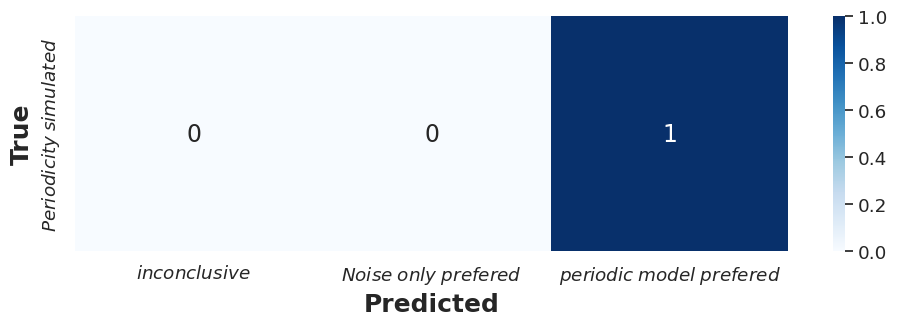

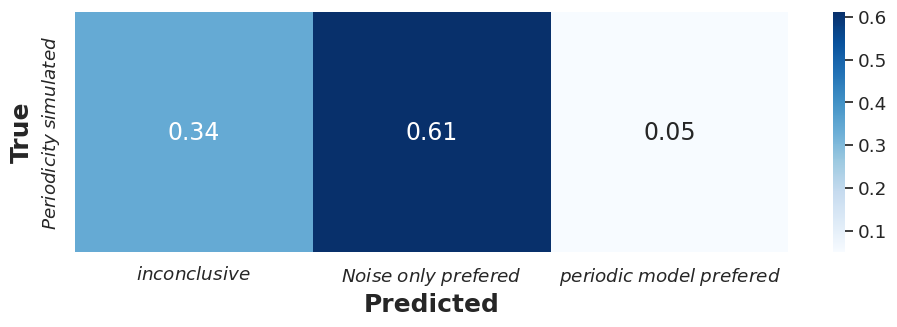

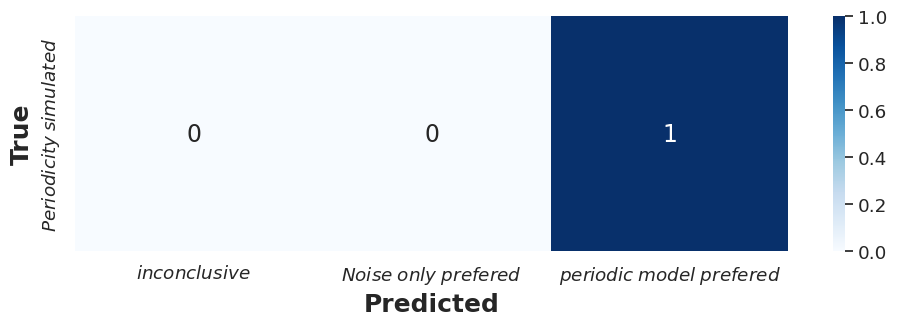

In [44]:
DRW_matrix = confusion_matrix_half(no_period_dataset = simdata5.loc[(simdata5.A1==0) ], #& (simdata5.bendfreq != bf_array[bf_ar_ind])], 
                        period_dataset=simdata5.loc[(simdata5.A1==0.375) &  (simdata5.period==0.75)], model='DRW')#& (simdata5.bendfreq != bf_array[bf_ar_ind]) ], model='DRW')
CARMA_matrix = confusion_matrix_half(no_period_dataset = simdata5.loc[(simdata5.A1==0) ],#& (simdata5.bendfreq != bf_array[bf_ar_ind])], 
                        period_dataset=simdata5.loc[(simdata5.A1==0.375) &  (simdata5.period==0.75)], model='CARMA21')#& (simdata5.bendfreq != bf_array[bf_ar_ind]) ], model='CARMA21')
OBPL_matrix = confusion_matrix_half(no_period_dataset = simdata5.loc[(simdata5.A1==0)],# & (simdata5.bendfreq != bf_array[bf_ar_ind])], 
                        period_dataset=simdata5.loc[(simdata5.A1==0.375) &  (simdata5.period==0.75)], model='OBPL')#& (simdata1.bendfreq != bf_array[bf_ar_ind]) ], model='OBPL')

# Observation length

In [4]:
simdata1 = datacollector(csv_file_path= 'simDATAcsvs/simDATA_highALPHA_3_NumofWINDOW_4_20.csv',
                         json_files_path='json_files/results_NumofWINDOW_4_20/json_files/highALPHA_3_NumofWINDOW_4_20/outputs/')

Collected all json files...
Not all json IDs are present in the datafile... Continuing with crossmatched IDs



Gathering data from json files to dataframe:   0%|          | 0/1700 [00:00<?, ?it/s]

FileNotFoundError: [Errno 2] No such file or directory: 'json_files/results_NumofWINDOW_4_20/json_files/highALPHA_3_NumofWINDOW_4_20/outputs/1000_DRW.json'

In [3]:
test = statPLOTS(simdata1)
simdata1

,ID,simSEED,sampleSEED,rms,noiseSIGMA,bendfreq,lowalpha,highalpha,sharpness,NumofWINDOW,...,OBPL10_bf,OBPLsine10_log_Z_mean,OBPLsine10_log_Z_uncert,OBPLsine10_bf,DRW_DRWsine_bayes,CARMA21_CARMA21sine_bayes,OBPL10_OBPLsine10_bayes,DRWsine_bool,CARMA21sine_bool,OBPLsine_bool
0,1000.0,48090.0,83055.0,0.15,0.015,0.00274,-1.0,-3.0,10.0,4.0,...,2.438291,153.066614,0.172876,2.367408,78.553412,339.470710,408.998659,0,-1,-1
1,1001.0,59982.0,23885.0,0.15,0.015,0.00274,-1.0,-3.0,10.0,4.0,...,0.689058,149.256091,0.154291,1.364735,34.192757,48.649185,57.038878,0,0,0
2,1002.0,95580.0,42170.0,0.15,0.015,0.00274,-1.0,-3.0,10.0,4.0,...,2.779332,144.763715,0.170694,2.628520,387.182552,1226.278862,1489.436980,-1,-1,-1
3,1003.0,86308.0,43423.0,0.15,0.015,0.00274,-1.0,-3.0,10.0,4.0,...,1.234857,144.344284,0.163483,3.034437,11.343010,36.013894,13.359481,0,0,0
4,1004.0,7357.0,86838.0,0.15,0.015,0.00274,-1.0,-3.0,10.0,4.0,...,1.035567,143.041689,0.182299,0.733539,0.452022,27.572151,1.337069,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,2695.0,12372.0,95589.0,0.15,0.015,0.00274,-1.0,-3.0,10.0,20.0,...,0.915124,733.198896,0.178811,0.806819,0.428761,132.543650,142.547263,0,-1,-1
1696,2696.0,75974.0,42835.0,0.15,0.015,0.00274,-1.0,-3.0,10.0,20.0,...,0.372239,755.343437,0.171329,0.476156,103.826711,260.677273,250.437375,-1,-1,-1
1697,2697.0,40384.0,77520.0,0.15,0.015,0.00274,-1.0,-3.0,10.0,20.0,...,0.744199,711.124323,0.180276,1.005446,3.647934,126.938166,155.648877,0,-1,-1
1698,2698.0,40895.0,21505.0,0.15,0.015,0.00274,-1.0,-3.0,10.0,20.0,...,0.464245,748.209740,0.176705,0.664722,65.783816,349.425426,770.283295,0,-1,-1


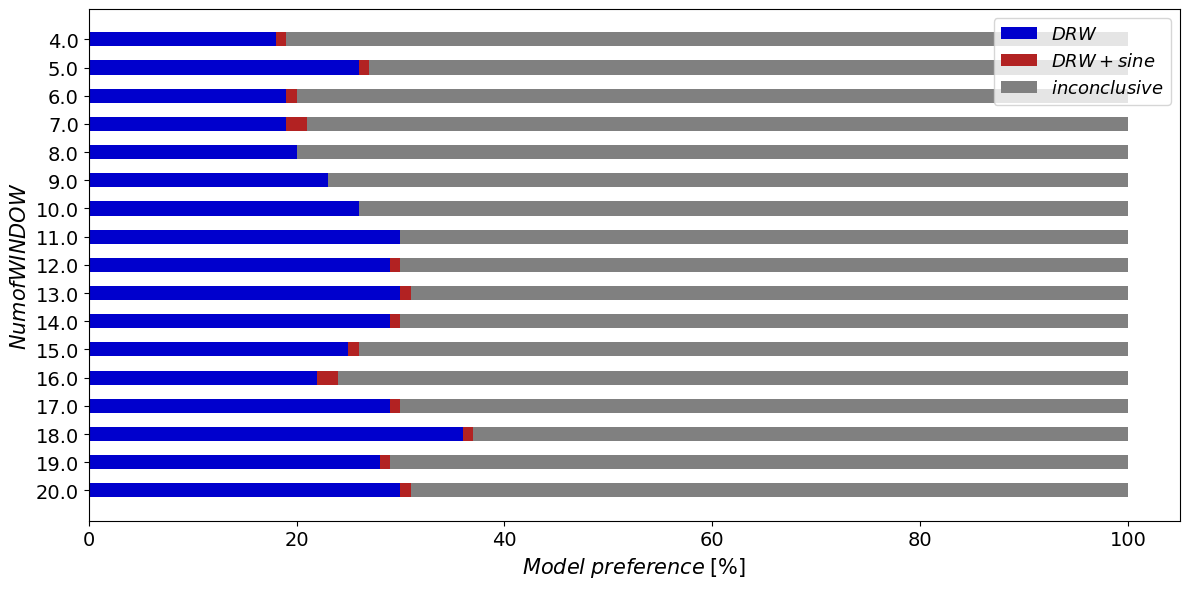

,$red\;noise\;only$,$red\;noise + period$,$inconclusive$
4.0,18,1,81
5.0,26,1,73
6.0,19,1,80
7.0,19,2,79
8.0,20,0,80
9.0,23,0,77
10.0,26,0,74
11.0,30,0,70
12.0,29,1,70
13.0,30,1,69


In [4]:
test.plot_barchart('NumofWINDOW', model = 'DRW')

# clustered and non_clustered

In [3]:
simdata1 = datacollector(csv_file_path= 'simDATAcsvs/simDATA_highALPHA_3_WINDOWwidth_2_12.csv',
                         json_files_path='json_files/results_WINDOWwidth_2_11/json_files/WINDOWwidth_2_12/outputs/')

Collected all json files...


Gathering data from json files to dataframe: 100%|██████████| 1000/1000 [01:08<00:00, 14.62it/s]


In [4]:
test = statPLOTS(simdata1)
simdata1

,ID,simSEED,sampleSEED,rms,noiseSIGMA,bendfreq,lowalpha,highalpha,sharpness,WINDOWwidth,...,OBPL10_bf,OBPLsine10_log_Z_mean,OBPLsine10_log_Z_uncert,OBPLsine10_bf,DRW_DRWsine_bayes,CARMA21_CARMA21sine_bayes,OBPL10_OBPLsine10_bayes,DRWsine_bool,CARMA21sine_bool,OBPLsine_bool
0,1000.0,24411.0,22633.0,0.15,0.015,0.00274,-1.0,-3.0,10.0,60.0,...,1.819671,454.086522,0.199175,1.207719,0.000136,23.958594,0.055891,1,0,0
1,1001.0,71294.0,14963.0,0.15,0.015,0.00274,-1.0,-3.0,10.0,60.0,...,0.578514,465.981480,0.164621,1.299503,5.387020,14.057984,16.834463,0,0,0
2,1002.0,46272.0,31962.0,0.15,0.015,0.00274,-1.0,-3.0,10.0,60.0,...,0.731880,458.318474,0.166763,0.931005,153.571172,197.852532,140.762121,-1,-1,-1
3,1003.0,49208.0,96074.0,0.15,0.015,0.00274,-1.0,-3.0,10.0,60.0,...,1.525143,479.434944,0.175715,1.423378,79.780913,191.846610,120.818011,0,-1,-1
4,1004.0,43313.0,77437.0,0.15,0.015,0.00274,-1.0,-3.0,10.0,60.0,...,1.645943,484.268802,0.171580,1.297508,35.777964,95.800202,102.225318,0,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1995.0,76998.0,57766.0,0.15,0.015,0.00274,-1.0,-3.0,10.0,330.0,...,0.537579,379.703933,0.167577,0.613430,2.875902,29.771212,59.064796,0,0,0
996,1996.0,18471.0,56954.0,0.15,0.015,0.00274,-1.0,-3.0,10.0,330.0,...,0.637418,400.937926,0.170150,1.080443,15.452661,84.199392,58.370424,0,0,0
997,1997.0,53663.0,90435.0,0.15,0.015,0.00274,-1.0,-3.0,10.0,330.0,...,0.522362,384.067092,0.169481,0.802181,28.315306,77.216381,90.425799,0,0,0
998,1998.0,95358.0,68383.0,0.15,0.015,0.00274,-1.0,-3.0,10.0,330.0,...,0.665667,395.882702,0.169212,0.994330,20.050111,80.247764,136.792781,0,0,-1


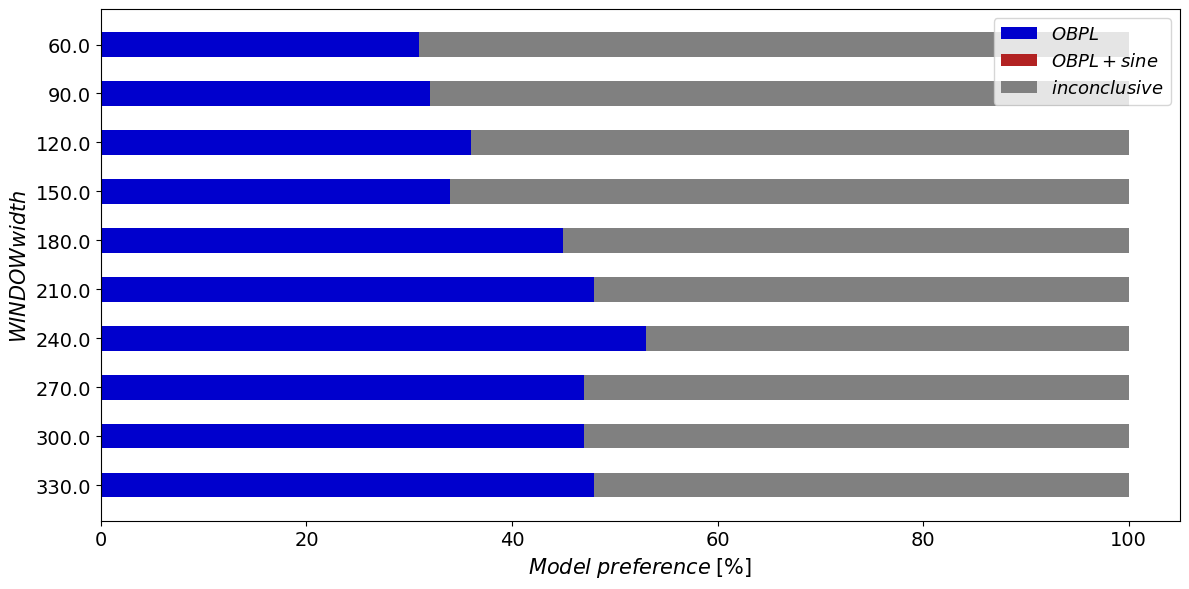

,$red\;noise\;only$,$red\;noise + period$,$inconclusive$
60.0,31,0,69
90.0,32,0,68
120.0,36,0,64
150.0,34,0,66
180.0,45,0,55
210.0,48,0,52
240.0,53,0,47
270.0,47,0,53
300.0,47,0,53
330.0,48,0,52


In [7]:
test.plot_barchart('WINDOWwidth', model = 'OBPL')

# all params

In [24]:
simdata1 = datacollector(csv_file_path= 'simDATAcsvs/simDATA_highALPHA_3_NumofWINDOW_14_period_0.75_6_A1_0.075_0.375_bendfreq_2_0.25.csv',
                         json_files_path='json_files/all_study_part1/outputs/')

Collected all json files...


Gathering data from json files to dataframe: 100%|██████████| 6800/6800 [08:08<00:00, 13.92it/s]


In [3]:

bf_array = list(set(simdata1.bendfreq))
A1_array = list(set(simdata1.A1))
period_array = list(set(simdata1.period))

test = statPLOTS(simdata1.loc[(simdata1.period == period_array[-1] )])
#test = statPLOTS(simdata1)

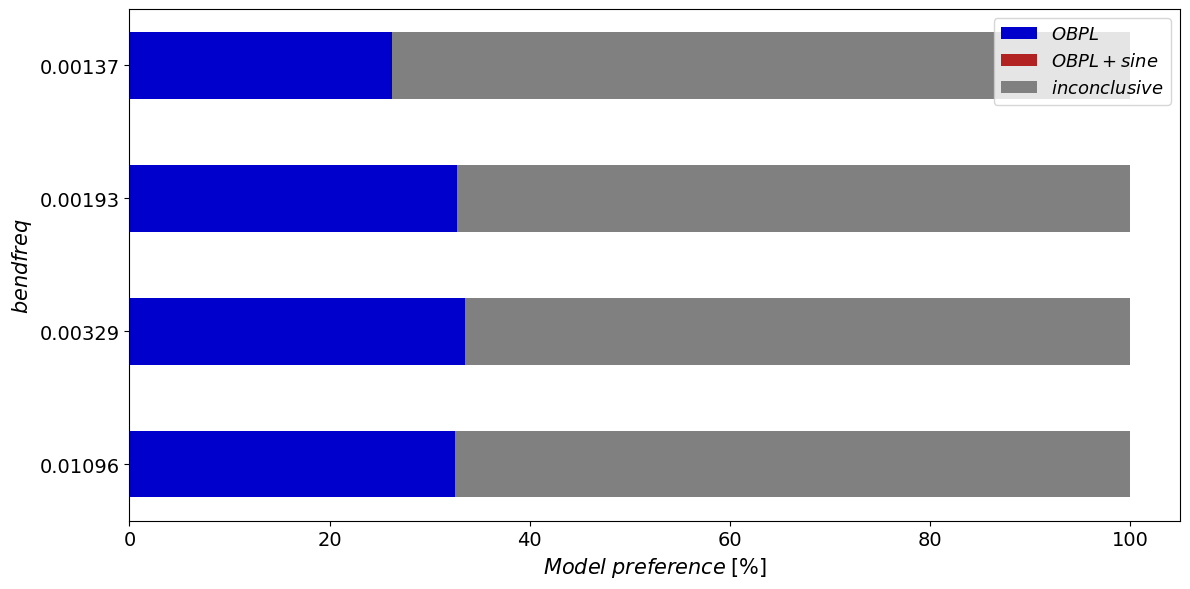

,$red\;noise\;only$,$red\;noise + period$,$inconclusive$
0.00,105,0,295
0.00,131,0,269
0.00,134,0,266
0.01,130,0,270


In [4]:
test.plot_barchart('bendfreq', model = 'OBPL')

In [49]:
simdata1.loc[(simdata1.A1==0.375) &  (simdata1.period==0.75),'rms'] = 0.0

#simdata1.loc[(simdata1.A1==0.375) &  (simdata1.period==0.75)].reset_index(drop=True).to_csv('simDATAcsvs/simDATA_highALPHA_3_NumofWINDOW_14_period_0.75_A1_0.375_no_variability.csv', index=False)

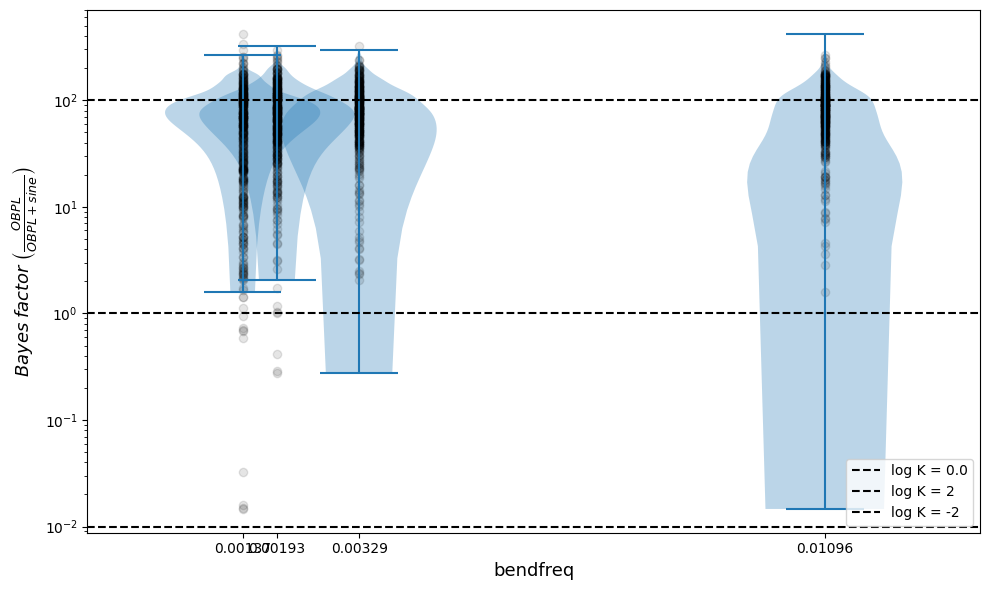

In [8]:
test.plot_bayesDistri('bendfreq', model = 'OBPL', plottype='violin')

In [72]:
def confusion_matrix( no_period_dataset, period_dataset, model='DRW'):
        if model =='DRW':
            boolvar = 'DRWsine_bool'
        if model =='CARMA21':
            boolvar = 'CARMA21sine_bool'
        if model =='OBPL':
            boolvar = 'OBPLsine_bool'
            
        no_period_prediction = no_period_dataset[boolvar].value_counts().to_dict()
        period_prediction = period_dataset[boolvar].value_counts().to_dict()
        
        for i in [-1,0,1]:
            if i not in no_period_prediction.keys():
                no_period_prediction[i] = 0
            if i not in period_prediction.keys():
                period_prediction[i] = 0
        
        confusion_matrix = np.zeros((2, 3), dtype=int)

        confusion_matrix[0, 0] = no_period_prediction[0]
        confusion_matrix[0, 1] = no_period_prediction[-1]
        confusion_matrix[0, 2] = no_period_prediction[1]
        confusion_matrix[1, 0] = period_prediction[0]
        confusion_matrix[1, 1] = period_prediction[-1]
        confusion_matrix[1, 2] = period_prediction[1]
        
        row_sums = confusion_matrix.sum(axis=1)
        new_matrix = confusion_matrix / row_sums[:,np.newaxis]
        
        plt.figure(figsize=(10, 7))
        sns.set(font_scale=1.2)
        #[['inconclusive', 'True Negative', 'False Postive'],['inconclusive', 'False Negative', 'True Positive']]
        sns.heatmap(new_matrix, annot=True, cmap='Blues',
                    xticklabels=['$inconclusive$', '$Noise\;only\;prefered$', '$periodic\;model\;prefered$'],
                    yticklabels=['$No\;periodicity\;simulated$', '$Periodicity\;simulated$'], square=False, annot_kws={'size': 17})

        plt.xlabel('Predicted', fontsize = 18, weight = 'bold')
        plt.ylabel('True', fontsize = 18, weight = 'bold')
        plt.tight_layout()
        plt.show()
        return new_matrix

In [70]:
set(simdata1.A1.to_list()),set(simdata1.period.to_list())

({0.0, 0.075, 0.1749999999999999, 0.2749999999999999, 0.375},
 {0.0, 0.75, 2.5, 4.25, 6.0})

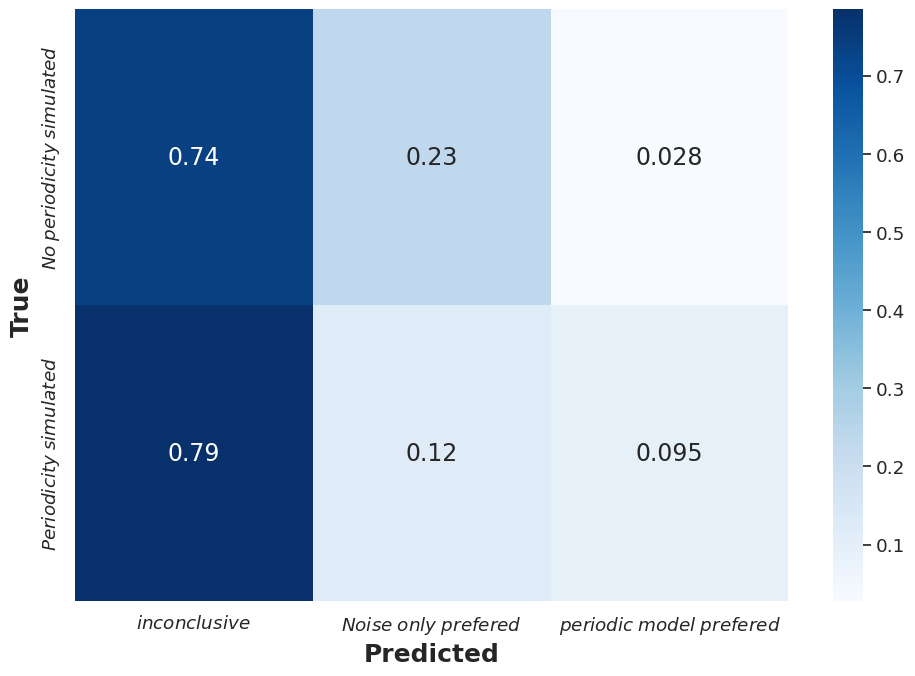

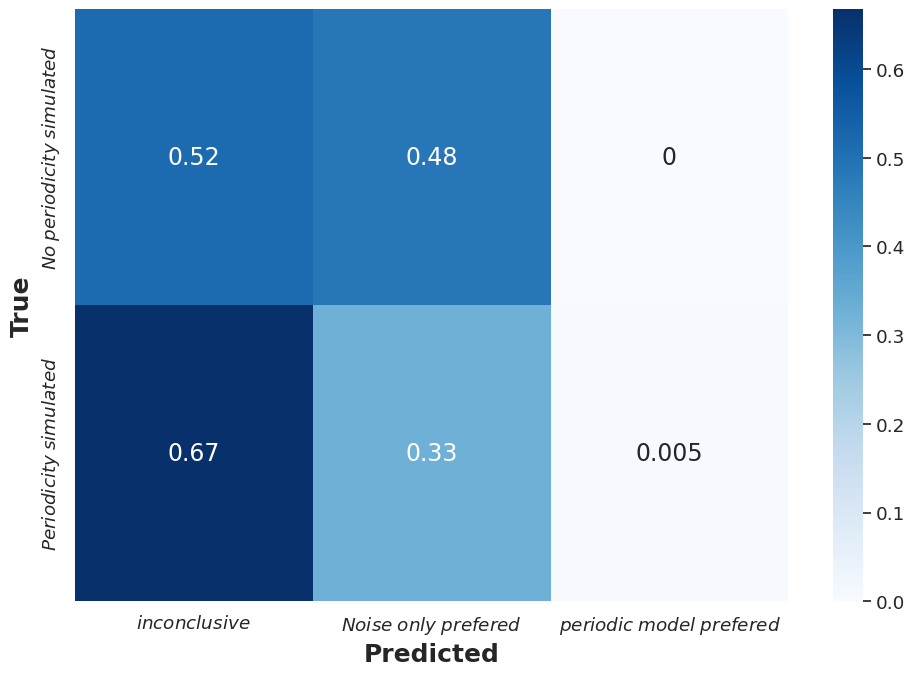

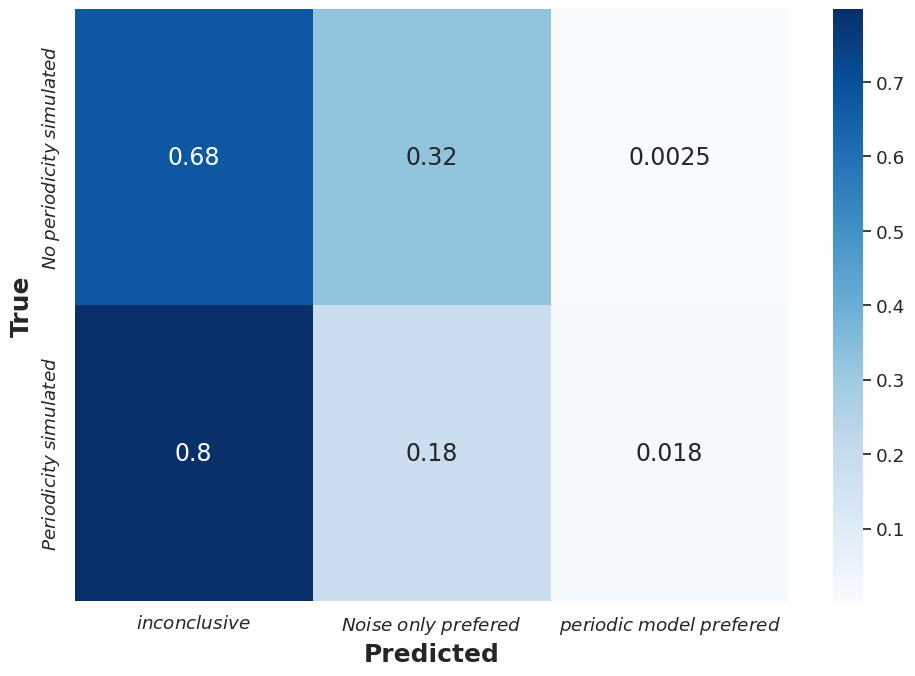

In [73]:
bf_ar_ind = 3

DRW_matrix = confusion_matrix(no_period_dataset = simdata1.loc[(simdata1.A1==0) ], #& (simdata1.bendfreq != bf_array[bf_ar_ind])], 
                        period_dataset=simdata1.loc[(simdata1.A1==0.375) &  (simdata1.period==0.75)], model='DRW')#& (simdata1.bendfreq != bf_array[bf_ar_ind]) ], model='DRW')
CARMA_matrix = confusion_matrix(no_period_dataset = simdata1.loc[(simdata1.A1==0) ],#& (simdata1.bendfreq != bf_array[bf_ar_ind])], 
                        period_dataset=simdata1.loc[(simdata1.A1==0.375) &  (simdata1.period==0.75)], model='CARMA21')#& (simdata1.bendfreq != bf_array[bf_ar_ind]) ], model='CARMA21')
OBPL_matrix = confusion_matrix(no_period_dataset = simdata1.loc[(simdata1.A1==0)],# & (simdata1.bendfreq != bf_array[bf_ar_ind])], 
                        period_dataset=simdata1.loc[(simdata1.A1==0.375) &  (simdata1.period==0.75)], model='OBPL')#& (simdata1.bendfreq != bf_array[bf_ar_ind]) ], model='OBPL')

In [42]:
OBPL_matrix[0][2]

0.0033333333333333335

In [63]:
FP_array = [DRW_matrix[0][2], CARMA_matrix[0][2], OBPL_matrix[0][2]]
TP_array = [DRW_matrix[1][2], CARMA_matrix[1][2], OBPL_matrix[1][2]]

In [64]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)


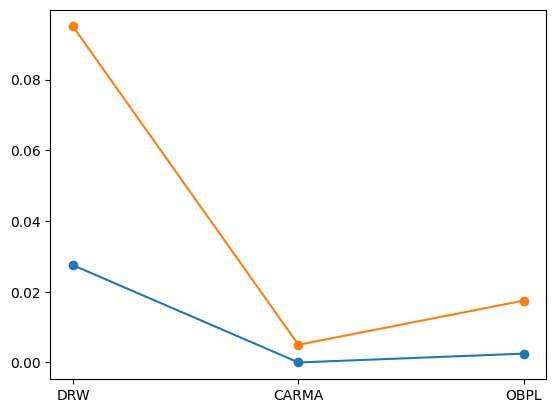

In [65]:
plt.plot(['DRW', 'CARMA', 'OBPL'],FP_array, 'o-')
plt.plot(['DRW', 'CARMA', 'OBPL'],TP_array, 'o-')
plt.show()

In [268]:
simdata1.loc[(simdata1.A1==0) & (simdata1.bendfreq == 0.010958904109589)]

,ID,simSEED,sampleSEED,rms,noiseSIGMA,bendfreq,lowalpha,highalpha,sharpness,period,A1,NumofWINDOW,NightsperWINDOW,OBSperiod,WINDOWwidth,dataLOSSfrac,DRW_log_Z_mean,DRW_log_Z_uncert,DRW_bf,DRWsine_log_Z_mean,DRWsine_log_Z_uncert,DRWsine_bf,CARMA21_log_Z_mean,CARMA21_log_Z_uncert,CARMA21sine_log_Z_mean,CARMA21sine_log_Z_uncert,OBPL10_log_Z_mean,OBPL10_log_Z_uncert,OBPL10_bf,OBPLsine10_log_Z_mean,OBPLsine10_log_Z_uncert,OBPLsine10_bf,DRW_DRWsine_bayes,CARMA21_CARMA21sine_bayes,OBPL10_OBPLsine10_bayes,DRWsine_bool,CARMA21sine_bool,OBPLsine_bool
51,49140.0,82136.0,64568.0,0.15,0.015,0.010959,-1.0,-3.0,10.0,0.0,0.0,14.666667,20,6,60,0.2,454.008085,0.120596,1.674710,448.926685,0.165412,1.392249,456.265872,0.141639,451.116552,0.181664,461.170322,0.120619,1.768291,456.447424,0.166595,3.113272,160.999385,172.314149,112.493769,-1,-1,-1
119,49380.0,55678.0,56780.0,0.15,0.015,0.010959,-1.0,-3.0,10.0,0.0,0.0,14.666667,20,6,60,0.2,438.588839,0.124780,3.156424,433.639794,0.173673,1.874041,436.793958,0.140716,431.561469,0.181242,439.202062,0.123201,2.273120,434.604425,0.176738,1.917948,141.040104,187.258332,99.249512,-1,-1,0
187,49620.0,95811.0,43751.0,0.15,0.015,0.010959,-1.0,-3.0,10.0,0.0,0.0,14.666667,20,6,60,0.2,443.537541,0.129053,6.148473,438.472970,0.183672,4.881850,446.841650,0.151552,441.273738,0.191530,449.840575,0.120773,3.023921,444.853442,0.168642,4.117206,158.312392,261.886768,146.515755,-1,-1,-1
255,49860.0,34730.0,78103.0,0.15,0.015,0.010959,-1.0,-3.0,10.0,0.0,0.0,14.666667,20,6,60,0.2,422.443507,0.127386,2.730262,417.275409,0.172487,2.261284,436.427604,0.148537,431.809793,0.186051,437.050621,0.124568,2.052726,432.647722,0.167561,2.388840,175.580470,101.272053,81.687272,-1,-1,0
323,50100.0,49020.0,32404.0,0.15,0.015,0.010959,-1.0,-3.0,10.0,0.0,0.0,14.666667,20,6,60,0.2,434.598563,0.124824,1.698255,430.940620,0.178188,1.375653,437.924710,0.143734,434.461999,0.185847,440.283268,0.126620,0.988312,436.103465,0.166717,1.146606,38.781458,31.903344,65.352987,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6511,71940.0,14963.0,43926.0,0.15,0.015,0.010959,-1.0,-3.0,10.0,0.0,0.0,14.666667,20,6,60,0.2,477.312277,0.125193,3.109803,474.331937,0.206089,2.286326,482.985041,0.145939,479.704870,0.203880,480.100105,0.123620,2.920891,477.118096,0.195250,2.794172,19.694508,26.580310,19.727422,0,0,0
6579,72180.0,9530.0,12641.0,0.15,0.015,0.010959,-1.0,-3.0,10.0,0.0,0.0,14.666667,20,6,60,0.2,415.926223,0.128786,2.631031,411.840637,0.184728,1.831173,432.696766,0.150200,427.413207,0.191330,432.140934,0.134549,2.322660,428.511433,0.181323,2.269020,59.476795,197.070079,37.693999,0,-1,0
6647,72420.0,30692.0,79692.0,0.15,0.015,0.010959,-1.0,-3.0,10.0,0.0,0.0,14.666667,20,6,60,0.2,393.750055,0.129999,3.904645,389.553886,0.190672,3.817884,421.480424,0.153663,416.456060,0.194956,410.281991,0.135641,3.312922,407.231501,0.195224,3.087371,66.431343,152.073394,21.125678,0,-1,0
6715,72660.0,31832.0,66033.0,0.15,0.015,0.010959,-1.0,-3.0,10.0,0.0,0.0,14.666667,20,6,60,0.2,441.179599,0.127715,3.856084,436.664740,0.184830,3.260141,446.535693,0.150337,441.562534,0.192240,450.493064,0.123172,4.956347,445.776348,0.175565,5.102831,91.364739,144.482693,111.800501,0,-1,-1


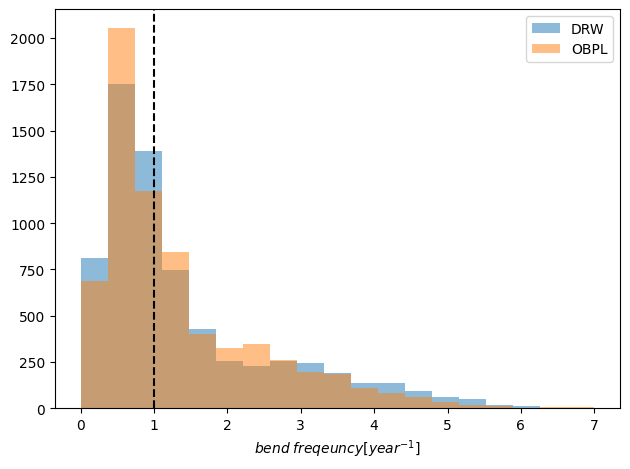

In [60]:

plt.hist(simdata1.DRW_bf, bins =np.linspace(0, 7, 20), alpha = 0.5, label = 'DRW')
plt.hist(simdata1.OBPL10_bf, bins =np.linspace(0, 7, 20), alpha = 0.5, label = 'OBPL')

plt.axvline(0.00274*365, ls = '--',color = 'k')
plt.legend()
plt.xlabel(r'$bend\;freqeuncy [year^{-1}]$')
plt.tight_layout()
plt.show()

# highALPHA -2 -4

In [5]:
simdata2 = datacollector(csv_file_path= 'simDATAcsvs/simDATA_highALPHA_2_4.csv',
                         json_files_path='json_files/highalpha_2_4/')

Collected all json files...


Gathering data from json files to dataframe: 100%|██████████| 1000/1000 [01:08<00:00, 14.69it/s]


In [6]:
test = statPLOTS(simdata2)


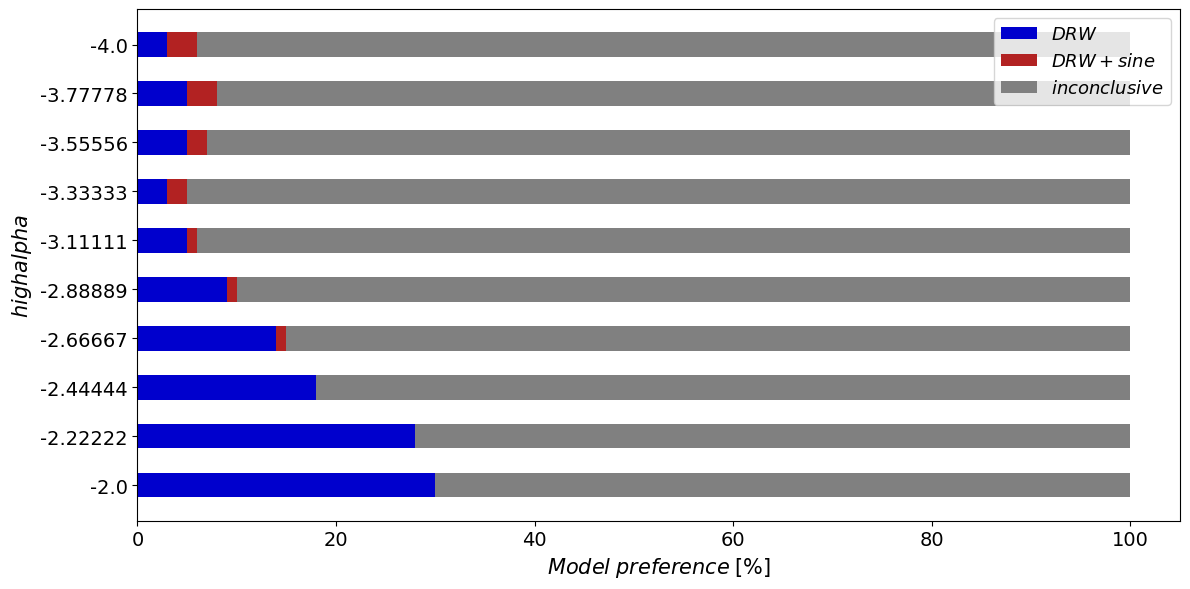

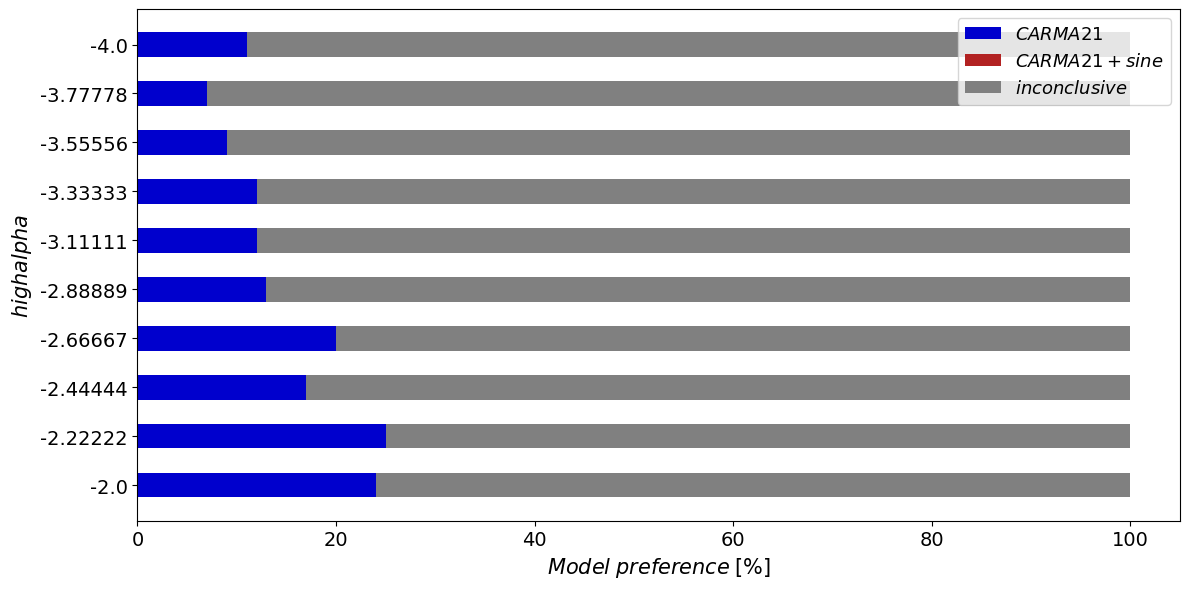

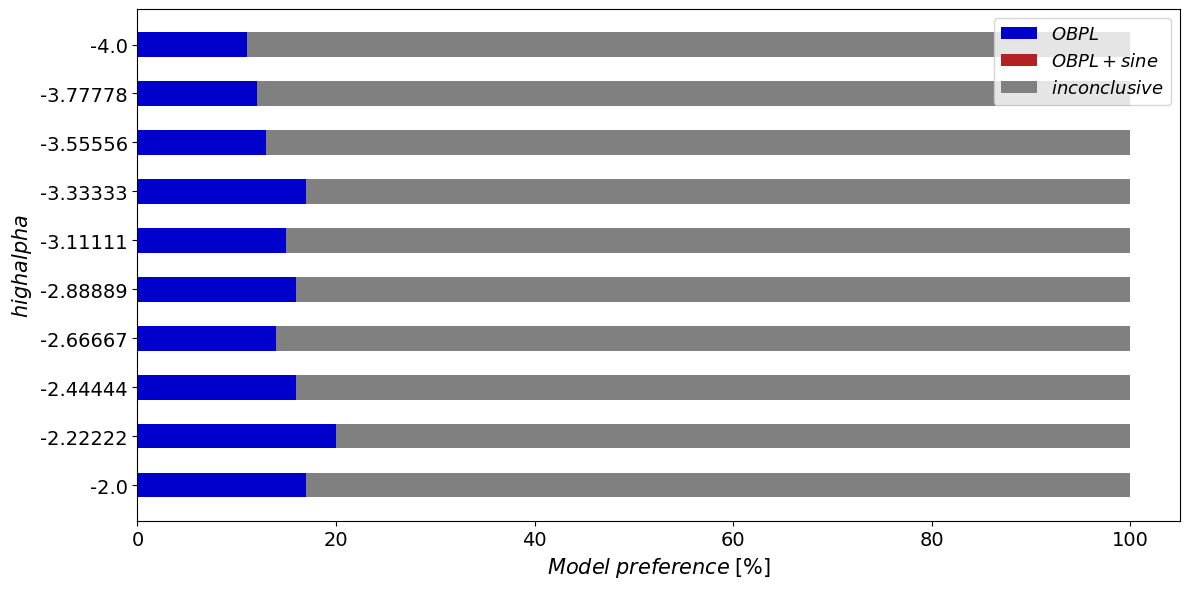

In [7]:
tDRW = test.plot_barchart('highalpha', model = 'DRW').sort_index(ascending=False)
tCARMA = test.plot_barchart('highalpha', model = 'CARMA21').sort_index(ascending=False)
tOBPL =  test.plot_barchart('highalpha', model = 'OBPL').sort_index(ascending=False)

In [5]:
tDRW.iloc[[0,1]]

,$red\;noise\;only$,$red\;noise + period$,$inconclusive$
-2.00,30,0,70
-2.22,28,0,72


In [31]:
def plot_clustered_stacked(dfall, labels=None, title="multiple stacked bar plot",  H="/", **kwargs):
    """Given a list of dataframes, with identical columns and index, create a clustered stacked bar plot. 
labels is a list of the names of the dataframe, used for the legend
title is a string for the title of the plot
H is the hatch used for identification of the different dataframe"""

    n_df = len(dfall)
    n_col = len(dfall[0].columns) 
    n_ind = len(dfall[0].index)
    plt.figure(figsize=[16, 7.5])
    axe = plt.subplot(111)

    for df in dfall : # for each data frame
        axe = df.plot(kind="bar",
                      linewidth=0,
                      stacked=True,
                      ax=axe,
                      legend=False,
                      grid=False,
                      color = ['blue', 'red', 'gray'],
                      **kwargs)  # make bar plots

    h,l = axe.get_legend_handles_labels() # get the handles we want to modify
    for i in range(0, n_df * n_col, n_col): # len(h) = n_col * n_df
        for j, pa in enumerate(h[i:i+n_col]):
            for rect in pa.patches: # for each index
                rect.set_x(rect.get_x() + 1 / float(n_df + 1) * i / float(n_col))
                rect.set_hatch(H * int(i / n_col)*2) #edited part   
                rect.set_edgecolor('white')  
                rect.set_width(1 / float(n_df + 1)/1.5)

    axe.set_xticks((np.arange(0, 2 * n_ind, 2) + 1 / float(n_df + 1)) / 2.)
    axe.set_xticklabels(df.index, rotation = 0)

    # Add invisible data to add another legend
    n=[]        
    for i in range(n_df):
        n.append(axe.bar(0, 0, color="gray", edgecolor = 'white',hatch=H * i))

    l1 = axe.legend(h[:n_col], l[:n_col], loc=[0.65, 0.97], fontsize =16, facecolor='white', framealpha=1)
    if labels is not None:
        l2 = plt.legend(n, labels, loc=[0.87, 0.97], fontsize =16,  facecolor='white', framealpha=1) 
    axe.add_artist(l1)
    plt.tick_params(labelsize = 15)
    plt.xlabel(r'$High\;Frequency\;slope$', fontsize = 16)
    plt.ylabel(r'$Model\;preference$', fontsize = 16)
    plt.tight_layout()
    plt.show()
    return axe

In [32]:
import matplotlib.colors as mcolors


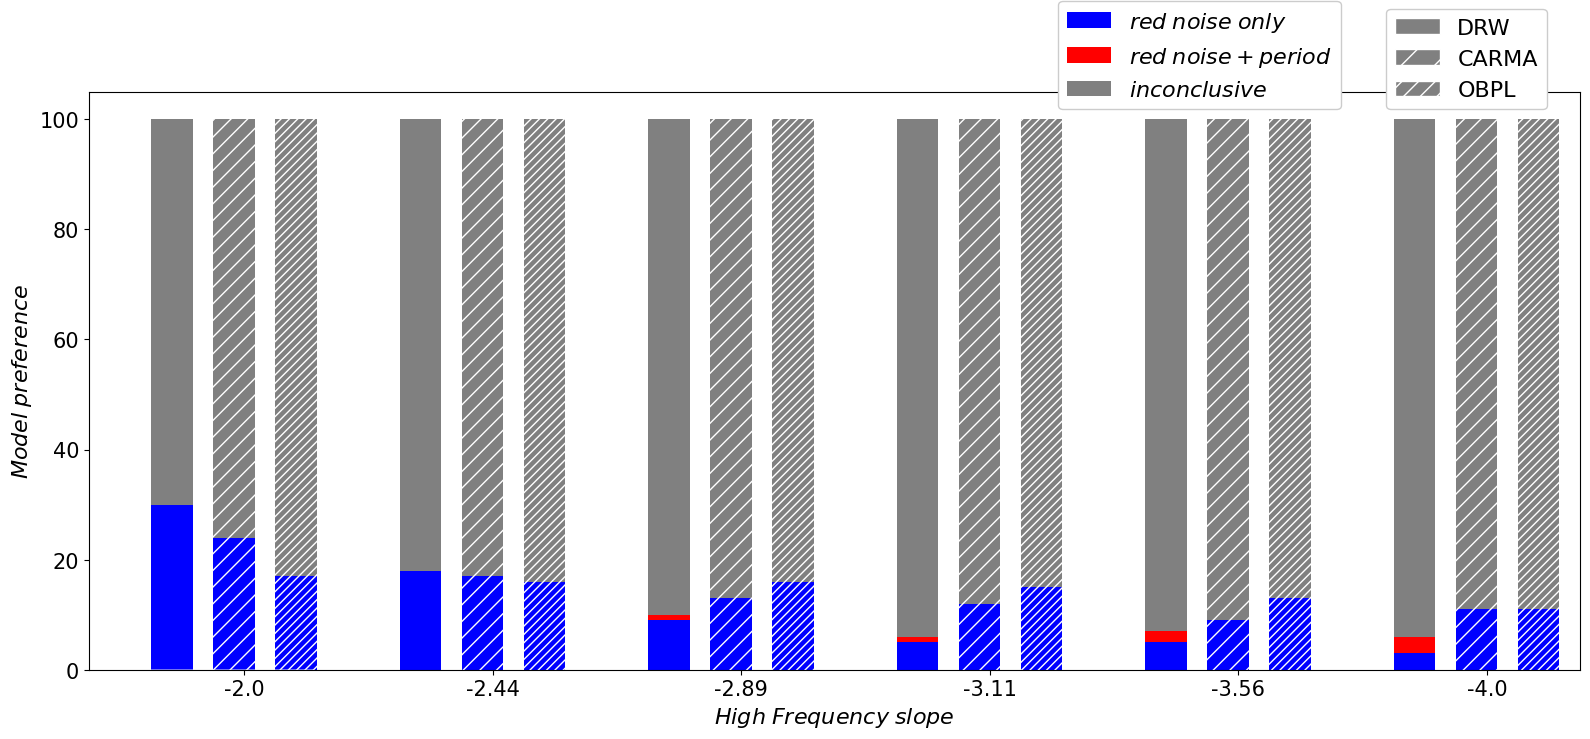

<Axes: xlabel='$High\\;Frequency\\;slope$', ylabel='$Model\\;preference$'>

In [33]:
plot_clustered_stacked([tDRW.iloc[[0,2,4,5,7,9]], tCARMA.iloc[[0,2,4,5,7,9]], tOBPL.iloc[[0,2,4,5,7,9]]],['DRW', 'CARMA', 'OBPL'])
#plot_clustered_stacked([tDRW.iloc[[0,2,4,5,7,9]], tCARMA.iloc[[0,2,4,5,7,9]]],['DRW', 'CARMA'])

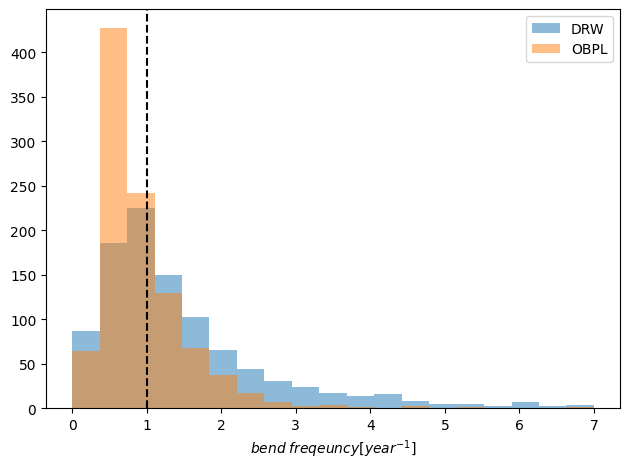

In [57]:

plt.hist(simdata1.DRW_bf, bins =np.linspace(0, 7, 20), alpha = 0.5, label = 'DRW')
plt.hist(simdata1.OBPL10_bf, bins =np.linspace(0, 7, 20), alpha = 0.5, label = 'OBPL')

plt.axvline(0.00274*365, ls = '--',color = 'k')
plt.legend()
plt.xlabel(r'$bend\;freqeuncy [year^{-1}]$')
plt.tight_layout()
plt.show()